In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=4)
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
#set_option (max_columns=50) we can see upto 50 columns 
pd.set_option("display.max_columns",50)

In [3]:
#read the dataset 
rta_data = pd.read_csv("E:\TMLC-PROJECT\RTA Dataset.csv")

In [4]:
#head gives us top 5 rows
rta_data.head(2)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
#tail gives us bottom 5 rows
rta_data.tail(2)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


#EXPLORATORY DATA ANALYSIS

In [6]:
#gives the row number and column number in tuple
rta_data.shape

(12316, 32)

In [7]:
#reprsent all column names
for i in rta_data.columns:
    print(i,end=" , ")

Time , Day_of_week , Age_band_of_driver , Sex_of_driver , Educational_level , Vehicle_driver_relation , Driving_experience , Type_of_vehicle , Owner_of_vehicle , Service_year_of_vehicle , Defect_of_vehicle , Area_accident_occured , Lanes_or_Medians , Road_allignment , Types_of_Junction , Road_surface_type , Road_surface_conditions , Light_conditions , Weather_conditions , Type_of_collision , Number_of_vehicles_involved , Number_of_casualties , Vehicle_movement , Casualty_class , Sex_of_casualty , Age_band_of_casualty , Casualty_severity , Work_of_casuality , Fitness_of_casuality , Pedestrian_movement , Cause_of_accident , Accident_severity , 

In [8]:
#use info function-short summary about dataset
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [9]:
#attributes dtypes: gives datatype every columns
rta_data.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [10]:
#create list for object datatype of coulmns and numeric datatype of columns
cat  = []   
num = []
for i in rta_data:
    if rta_data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)

here we can see that most of the columns we have object data type only few of numerical datatype columns

In [11]:
print("These all columns have object datatype  of values:",cat,end=" ")
print(" ")
print("<---------------->")
print("These columns int64 datatype of values:",num,end="")

These all columns have object datatype  of values: ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']  
<---------------->
These columns int64 datatype of values: ['Number_of_vehicles_involved', 'Number_of_casualties']

In [12]:
#convert all column names into lower case
rta_data.columns = rta_data.columns.str.lower()

In [13]:
cat_l  = []   
num_l = []
for i in rta_data:
    if rta_data[i].dtype=="object":
        cat_l.append(i)
    else:
        num_l.append(i)

In [14]:
print("These all columns have objectdatatype  of values:",cat_l,end=" ")
print(" ")
print("<---------------->")
print("These columns int64 datatype of values:",num_l,end="")

These all columns have objectdatatype  of values: ['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle', 'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'road_allignment', 'types_of_junction', 'road_surface_type', 'road_surface_conditions', 'light_conditions', 'weather_conditions', 'type_of_collision', 'vehicle_movement', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement', 'cause_of_accident', 'accident_severity']  
<---------------->
These columns int64 datatype of values: ['number_of_vehicles_involved', 'number_of_casualties']

In [15]:
#calculate summary of statistics
#describe function defaultly only give for numerical columns statistics
rta_data.describe()

,number_of_vehicles_involved,number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [16]:
#if we want to know statistics summary of object datatype columns so we do like this 
rta_data.describe(include="object").T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
age_band_of_driver,12316,5,18-30,4271
sex_of_driver,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
type_of_vehicle,11366,17,Automobile,3205
owner_of_vehicle,11834,4,Owner,10459
service_year_of_vehicle,8388,6,Unknown,2883


In [17]:
#checking missing values maximum missing value in Defect_of_vehicle column
rta_data.isnull().sum()

time                              0
day_of_week                       0
age_band_of_driver                0
sex_of_driver                     0
educational_level               741
vehicle_driver_relation         579
driving_experience              829
type_of_vehicle                 950
owner_of_vehicle                482
service_year_of_vehicle        3928
defect_of_vehicle              4427
area_accident_occured           239
lanes_or_medians                385
road_allignment                 142
types_of_junction               887
road_surface_type               172
road_surface_conditions           0
light_conditions                  0
weather_conditions                0
type_of_collision               155
number_of_vehicles_involved       0
number_of_casualties              0
vehicle_movement                308
casualty_class                    0
sex_of_casualty                   0
age_band_of_casualty              0
casualty_severity                 0
work_of_casuality           

In [18]:
#Modifiaction In Time Column
def get_time(t):
    t = t[:2]
    if ":" in t:
        t = t[:1]
    return int(t)
def con_t(t):
    if t>=6 and t<18:
        return "Day"
    else:
        return "Night"

In [19]:
rta_data["time"] = rta_data["time"].apply(lambda x:get_time(x))
rta_data["time"] = rta_data["time"].apply(lambda x:con_t(x))

#here we can see that most of accident happend in day time comapare to night time

In [20]:
rta_data["time"].value_counts()

Day      8361
Night    3955
Name: time, dtype: int64

#Visualization

In [21]:
lab  = rta_data["accident_severity"].value_counts().index
val = rta_data["accident_severity"].value_counts().values

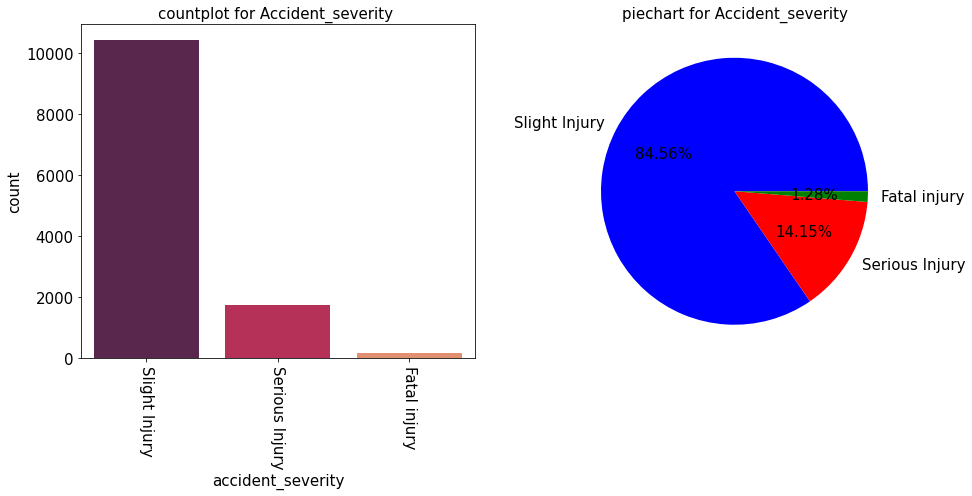

In [22]:
#piechart for Diff. Age Group persons
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
fontsize=15
plt.title("countplot for Accident_severity ",fontsize=fontsize)
plt.xticks(rotation=270,fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("Accident_severity".title(),fontsize=fontsize)
plt.ylabel("count".title(),fontsize=fontsize)
sns.countplot(x="accident_severity",data=rta_data,palette="rocket");
plt.subplot(1,2,2)
colors = ['b','r','g'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart
fontsize=15
plt.title("piechart for Accident_severity",fontsize=fontsize)
plt.pie(x = val,labels = lab,autopct="%2.2f%%",textprops=textprops,colors=colors);
plt.tight_layout()


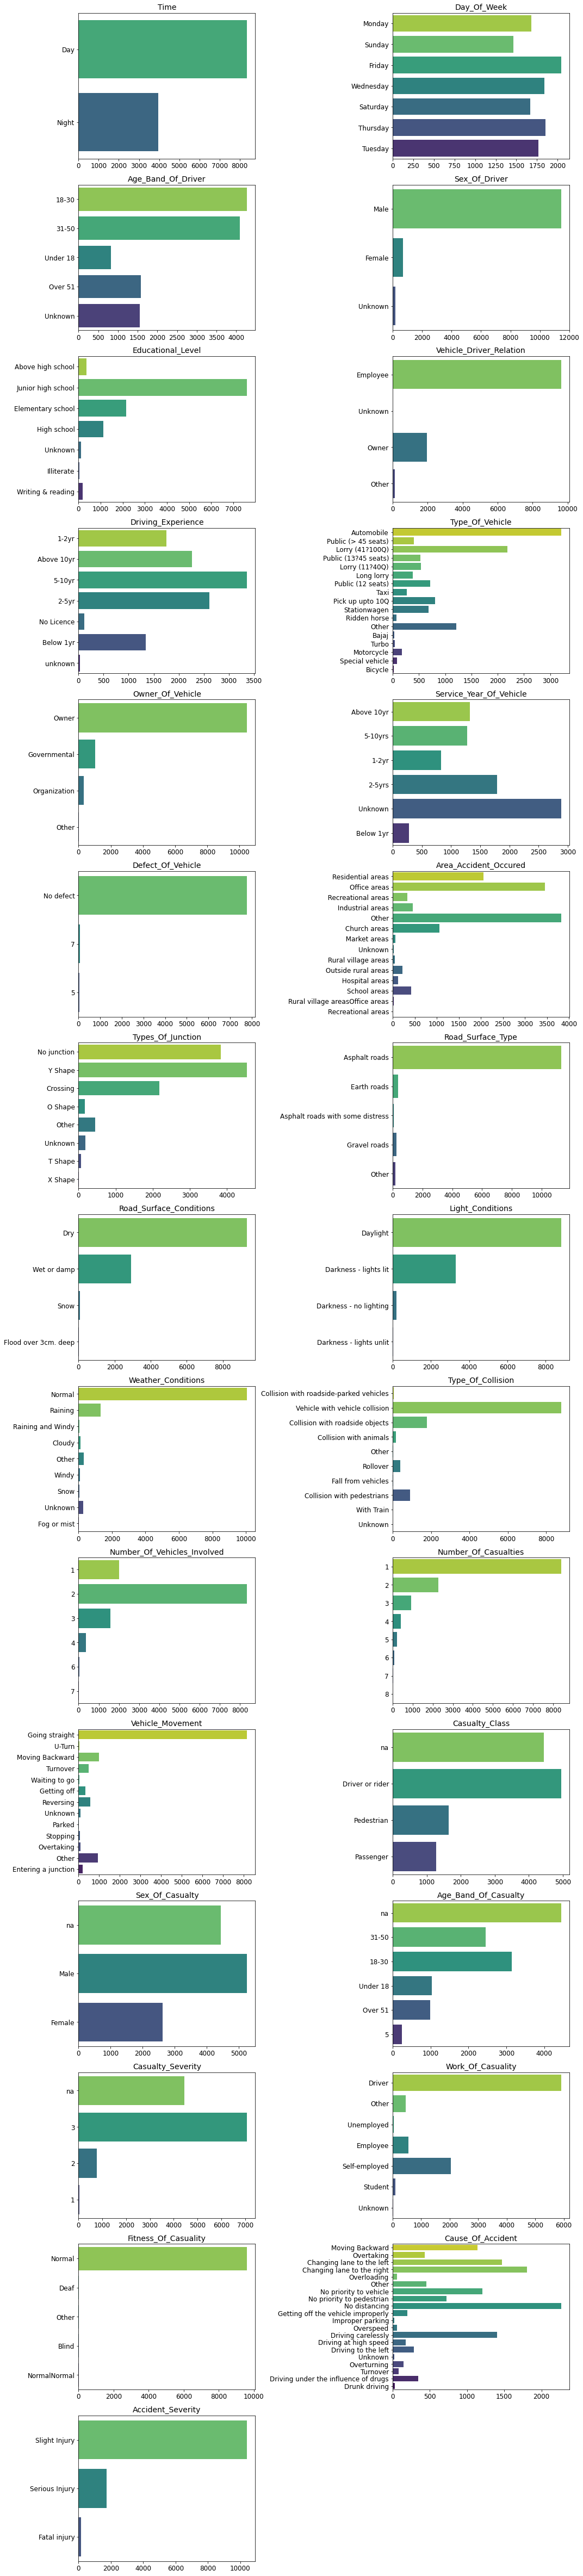

In [23]:
plt.figure(figsize=(15,70))
plotnumber = 1
for col in rta_data.drop(["pedestrian_movement","lanes_or_medians","road_allignment"], axis=1):
    if plotnumber <= rta_data.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=rta_data, y=col, palette='viridis_r')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

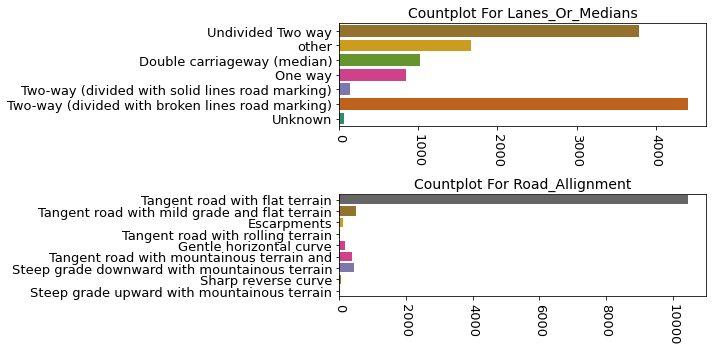

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.countplot(data=rta_data,y="lanes_or_medians",palette="Dark2_r");
plt.title("countplot for lanes_or_medians".title(),fontsize=14)
plt.xticks(rotation=270,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.subplot(2,1,2)
sns.countplot(data=rta_data,y="road_allignment",palette="Dark2_r");
plt.title("countplot for road_allignment".title(),fontsize=14)
plt.xticks(rotation=270,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

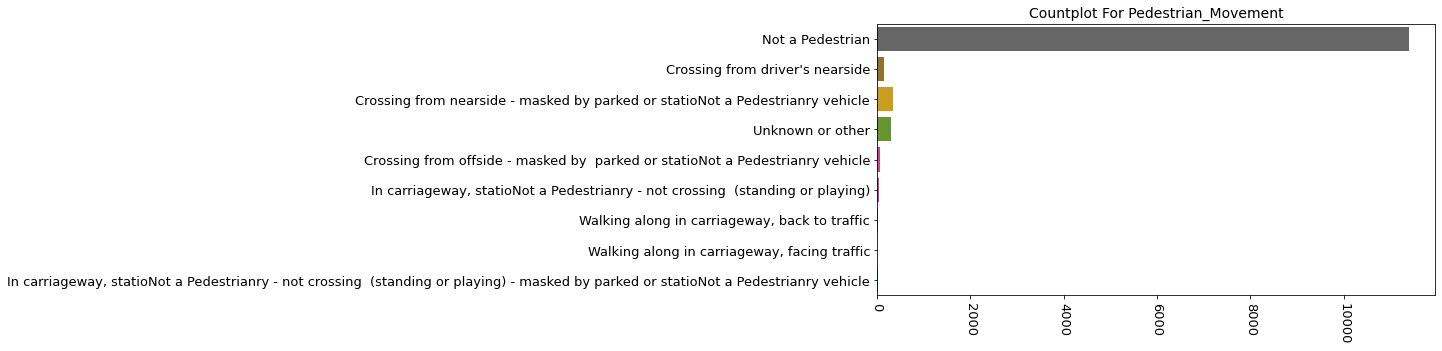

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=rta_data,y="pedestrian_movement",palette="Dark2_r");
plt.title("countplot for pedestrian_movement".title(),fontsize=14)
plt.xticks(rotation=270,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#here we can say that most male is the most number of driver female is very less 

In [26]:
#show only numerical datatype values
rta_data[num_l].head(2)

,number_of_vehicles_involved,number_of_casualties
0,2,2
1,2,2


In [27]:
#show only object data type values
rta_data[cat_l].head(2)

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,Day,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Day,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [28]:
rta_data["sex_of_driver"].value_counts()

Male       11437
Female       701
Unknown      178
Name: sex_of_driver, dtype: int64

## Featur Engineering

In [29]:
#show columns which having null values 
rta_data.isnull().sum()[rta_data.isna().sum()!=0].sort_values(ascending=False)

defect_of_vehicle          4427
service_year_of_vehicle    3928
work_of_casuality          3198
fitness_of_casuality       2635
type_of_vehicle             950
types_of_junction           887
driving_experience          829
educational_level           741
vehicle_driver_relation     579
owner_of_vehicle            482
lanes_or_medians            385
vehicle_movement            308
area_accident_occured       239
road_surface_type           172
type_of_collision           155
road_allignment             142
dtype: int64

In [30]:
#show columns which are not having null values
rta_data.isnull().sum()[rta_data.isnull().sum()==0]

time                           0
day_of_week                    0
age_band_of_driver             0
sex_of_driver                  0
road_surface_conditions        0
light_conditions               0
weather_conditions             0
number_of_vehicles_involved    0
number_of_casualties           0
casualty_class                 0
sex_of_casualty                0
age_band_of_casualty           0
casualty_severity              0
pedestrian_movement            0
cause_of_accident              0
accident_severity              0
dtype: int64

we can see that first four columns have more null values which is cause imbalance data so we remove those columns

In [31]:
#remove those columns which have more null values and weather _conditions is not more informative
rta_data.drop(["defect_of_vehicle","service_year_of_vehicle","work_of_casuality","fitness_of_casuality","weather_conditions"],axis=1,inplace=True)

In [32]:
#here we can convert na,unknown,Unknown to np.nan
rta_data = rta_data.replace(["na","unknown","Unknown"],np.nan)

In [33]:
rta_data.isnull().sum()[rta_data.isnull().sum()!=0]

age_band_of_driver         1548
sex_of_driver               178
educational_level           841
vehicle_driver_relation     593
driving_experience          862
type_of_vehicle             950
owner_of_vehicle            482
area_accident_occured       261
lanes_or_medians            442
road_allignment             142
types_of_junction          1078
road_surface_type           172
type_of_collision           169
vehicle_movement            396
casualty_class             4443
sex_of_casualty            4443
age_band_of_casualty       4443
casualty_severity          4443
cause_of_accident            25
dtype: int64

In [34]:
#rta_data1.isnull().sum()[rta_data1.isnull().sum()!=0]

In [35]:
#store all columns except numeric column and target column in rta_data1
rta_data1 = rta_data.drop(["number_of_vehicles_involved","number_of_casualties","accident_severity"],axis=1)
#store numerical column and target column in rta_data2
rta_data2 = rta_data[["number_of_vehicles_involved","number_of_casualties","accident_severity"]]

Label Encoding

In [36]:
#col1 stores all features whichever include null values
col1 = rta_data1.loc[:,rta_data1.isnull().sum()!=0]
#col2 stores all features whichever include not null values
col2 = rta_data1.loc[:,rta_data1.isnull().sum()==0]

In [37]:
#checking null values features
col1.isnull().sum()

age_band_of_driver         1548
sex_of_driver               178
educational_level           841
vehicle_driver_relation     593
driving_experience          862
type_of_vehicle             950
owner_of_vehicle            482
area_accident_occured       261
lanes_or_medians            442
road_allignment             142
types_of_junction          1078
road_surface_type           172
type_of_collision           169
vehicle_movement            396
casualty_class             4443
sex_of_casualty            4443
age_band_of_casualty       4443
casualty_severity          4443
cause_of_accident            25
dtype: int64

In [38]:
#checking not null values features
col2.isnull().sum()

time                       0
day_of_week                0
road_surface_conditions    0
light_conditions           0
pedestrian_movement        0
dtype: int64

In [39]:
#label encoding
#label encoder does encoding based on alphabtically order
le = LabelEncoder()
for i in col1.columns:
    col1[i] = col1[i].replace(np.nan,"0")
    x = le.fit_transform(col1[i])
    col1[i] = x
    col1[i] = col1[i].astype("int64").replace(0,np.nan)

for j in col2.columns:
    col2[j] = le.fit_transform(col2[j])+1

In [40]:
#concatenation 
label_data = pd.concat([col2,col1],axis=1)
final_data = pd.concat([label_data,rta_data2],axis=1)

In [41]:
#final_data["sex_of_driver"].value_counts()

In [42]:
final_data.head()

,time,day_of_week,road_surface_conditions,light_conditions,pedestrian_movement,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,type_of_collision,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,cause_of_accident,number_of_vehicles_involved,number_of_casualties,accident_severity
0,1,2,1,4,6,1.0,2.0,1.0,1.0,1.0,1.0,4.0,10.0,NaN,6.0,2.0,1.0,4.0,3.0,NaN,NaN,NaN,NaN,10.0,2,2,Slight Injury
1,1,2,1,4,6,2.0,2.0,5.0,1.0,4.0,12.0,4.0,7.0,5.0,6.0,2.0,1.0,8.0,3.0,NaN,NaN,NaN,NaN,17.0,2,2,Slight Injury
2,1,2,1,4,6,1.0,2.0,5.0,1.0,1.0,6.0,4.0,1.0,6.0,NaN,2.0,1.0,3.0,3.0,1.0,2.0,2.0,3.0,1.0,2,2,Serious Injury
3,2,4,1,1,6,1.0,2.0,5.0,1.0,3.0,12.0,1.0,7.0,6.0,7.0,7.0,3.0,8.0,3.0,3.0,1.0,1.0,3.0,2.0,2,2,Slight Injury
4,2,4,1,1,6,1.0,2.0,5.0,1.0,2.0,NaN,4.0,4.0,6.0,6.0,7.0,1.0,8.0,3.0,NaN,NaN,NaN,NaN,17.0,2,2,Slight Injury


In [43]:
#x['casualty_class'].value_counts()

In [44]:
y = final_data[['accident_severity']]
x = final_data.drop(["accident_severity"],axis=1)

## KNN Imputer

In [46]:
x_im = knn.fit_transform(x)
imputed_x= round(pd.DataFrame(x_im,columns=x.columns),0) 

In [47]:
#cleaned data frmae
imputed_x.isnull().sum()

time                           0
day_of_week                    0
road_surface_conditions        0
light_conditions               0
pedestrian_movement            0
age_band_of_driver             0
sex_of_driver                  0
educational_level              0
vehicle_driver_relation        0
driving_experience             0
type_of_vehicle                0
owner_of_vehicle               0
area_accident_occured          0
lanes_or_medians               0
road_allignment                0
types_of_junction              0
road_surface_type              0
type_of_collision              0
vehicle_movement               0
casualty_class                 0
sex_of_casualty                0
age_band_of_casualty           0
casualty_severity              0
cause_of_accident              0
number_of_vehicles_involved    0
number_of_casualties           0
dtype: int64

In [48]:
pd.crosstab(y.accident_severity,imputed_x.day_of_week).head()

day_of_week,1.0,2.0,3.0,4.0,5.0,6.0,7.0
accident_severity,,,,,,,
Fatal injury,16,12,37,35,22,17,19
Serious Injury,313,204,245,190,272,257,262
Slight Injury,1712,1465,1384,1242,1557,1496,1559


In [50]:
# male is most number of fatal,serious,slight injured compared to female and other person
pd.crosstab(y.accident_severity,imputed_x.sex_of_driver).head()

sex_of_driver,1.0,2.0
accident_severity,,
Fatal injury,5,153
Serious Injury,104,1639
Slight Injury,592,9823


In [49]:
pd.crosstab(y.accident_severity,imputed_x.time).head()

time,1.0,2.0
accident_severity,,
Fatal injury,77,81
Serious Injury,1111,632
Slight Injury,7173,3242


In [51]:
x_train,x_test,y_train,y_test = train_test_split(imputed_x,y,test_size=0.30,random_state=45)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [53]:
LR.score(x_train,y_train)

0.845957545528361

In [54]:
LR.score(x_test,y_test)

0.8449255751014885

In [55]:
y_pred = LR.predict(x_test)

In [56]:
confusion_matrix(y_pred,y_test)

array([[   0,    0,    0],
       [   0,    0,    0],
       [  53,  520, 3122]], dtype=int64)